<a href="https://colab.research.google.com/github/Yusra-Zafar/Deep-Learning/blob/main/MLP-classification/mnist_digit_classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits prediction using ANN/MLP(multi-class classification)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras

In [2]:
# load builtin mnist dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
# first image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

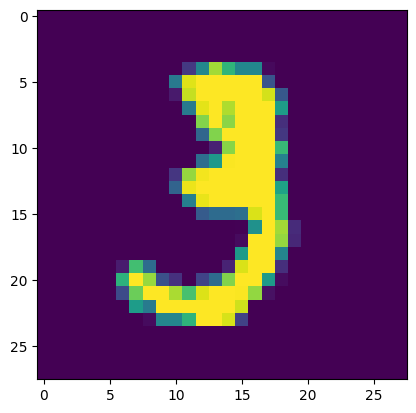

In [6]:
plt.imshow(X_train[10])

In [7]:
# scaling pixel values
X_train = X_train/255
X_test = X_test/255

In [8]:
# making ANN architecture
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [9]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

![](https://drive.google.com/uc?id=1gNDYNs_5-UXr9QciEQDv8AMV8jgRG9Tx)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
y_train[0]

5

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [13]:
history = model.fit(X_train, y_train, epochs=5, validation_split = 0.2, verbose=True)

Epoch 1/5
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2445 - accuracy: 0.9300 - val_loss: 0.1374 - val_accuracy: 0.9594
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1019 - accuracy: 0.9693 - val_loss: 0.0942 - val_accuracy: 0.9712
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0942 - val_accuracy: 0.9722
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0826 - val_accuracy: 0.9754
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0811 - val_accuracy: 0.9759


In [14]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[4.7197366e-09, 2.0404151e-08, 5.4944434e-07, ..., 9.9957258e-01,
        2.1916193e-08, 1.3987614e-06],
       [5.6227717e-10, 1.5546566e-04, 9.9984384e-01, ..., 3.6943267e-13,
        4.0336897e-07, 1.7929148e-13],
       [5.1804058e-08, 9.9963903e-01, 7.9637153e-05, ..., 1.4489531e-04,
        1.2313992e-04, 5.0290168e-07],
       ...,
       [4.5758313e-16, 8.0990901e-11, 4.6495769e-15, ..., 3.2099958e-08,
        1.7446810e-09, 1.3614227e-06],
       [6.7800647e-11, 1.1051793e-09, 3.5451267e-11, ..., 2.7983003e-09,
        5.5051201e-05, 5.1920742e-11],
       [1.7604909e-09, 2.7974167e-10, 1.2714786e-08, ..., 1.7756890e-14,
        2.4966178e-09, 2.1170231e-12]], dtype=float32)

In [15]:
# convert probabilities into integers
y_pred = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

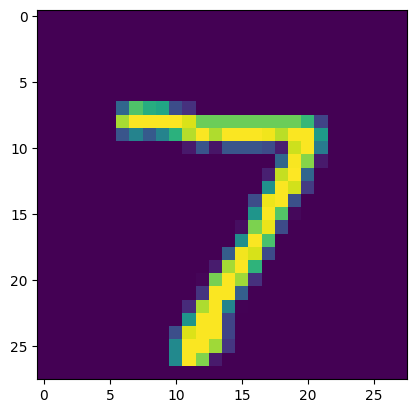

In [17]:
plt.imshow(X_test[0])

In [18]:
model.predict((X_test[0]).reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 63ms/step


array([7])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.976

<function matplotlib.pyplot.show(close=None, block=None)>

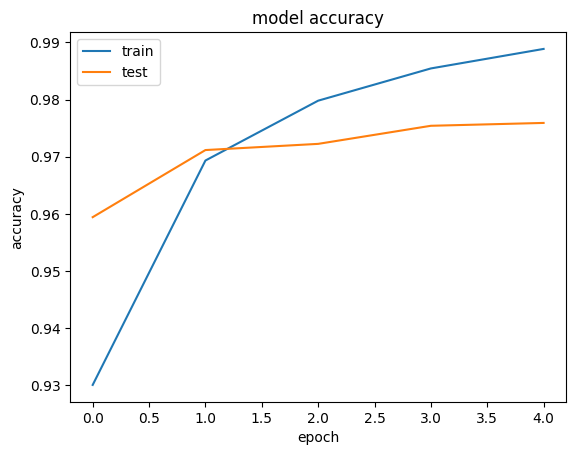

In [20]:
# visualizing performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

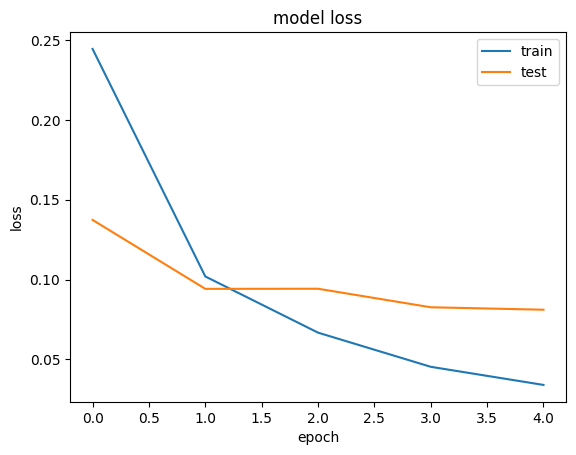

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show